# EDA

In [2]:
!pip install seaborn

     -------------------------------------- 285.1/285.1 kB 8.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
train = pd.read_csv('data/train.csv') 

In [7]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


# hour  변수 & count

- 시간별 얼마나 빌렸는지 분석해보자
- 시간별 평균 count를 구해보자

<AxesSubplot: xlabel='hour'>

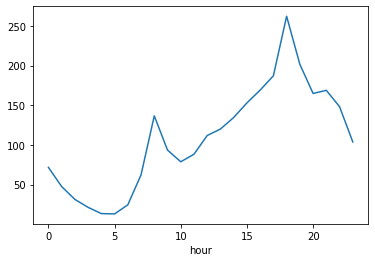

In [10]:
train.groupby(['hour'])['count'].mean().plot()

Text(16, 150, 'leave work')

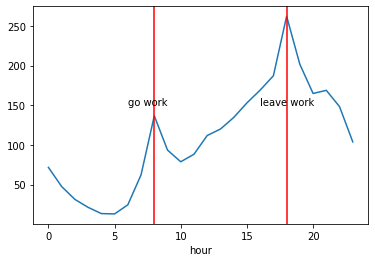

In [11]:
train.groupby(['hour'])['count'].mean().plot()
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(6, 150, 'go work')
plt.text(16, 150, 'leave work')

In [19]:
train.groupby(['hour'])['count'].mean()

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

여기서 얻은 인사이트

- go work 와 leave work쪽에 증가하는 방향으로 dummy variable을 주면 성능이 향상할 것으로 보인다. 
- 시간이 증가하면, 자전거 대여수는 높아진다고 말할 수 있다.

In [41]:
train[(train['hour'] ==8 ) | (train['hour'] == 18)]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,work,leave
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,0,1
19,34,18,18.0,1.0,1.9,82.0,685.0,0.044,99.0,42.0,15.0,0,1
21,36,8,12.6,0.0,5.3,53.0,1576.0,0.014,52.0,40.0,209.0,1,0
104,160,8,19.4,0.0,2.7,71.0,627.0,0.053,68.0,39.0,191.0,1,0
107,165,18,25.4,0.0,3.4,33.0,2000.0,0.060,40.0,21.0,369.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,2090,18,27.5,0.0,3.8,47.0,1507.0,0.083,64.0,40.0,398.0,0,1
1415,2121,8,8.6,0.0,2.0,89.0,223.0,0.010,74.0,64.0,34.0,1,0
1427,2138,18,28.1,0.0,4.4,25.0,862.0,0.125,94.0,53.0,300.0,0,1
1436,2154,18,20.3,0.0,4.7,25.0,1994.0,0.053,43.0,20.0,242.0,0,1


In [17]:
#새로운 변수 추가
train['work'] = 0

In [45]:

train.loc[(train['hour'] ==8 ) | (train['hour'] == 18), 'work'] = 1


In [43]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,work,leave
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0,0,0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0,0,0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0,0,0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0,0,0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0,0,0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0,0,0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0,0,0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0,0,0


# 나머지 분포들

- 기온에 따른 count
- 풍속에 따른 count 
- 습도에 따른 count
- visibility에 따른 count
- pm10에 따른 count
- pm2.5에 따른 count